##  TSP Miller–Tucker–Zemlin (MTZ) formulation

##### Keywords:  TSP, MTZ, Miller–Tucker–Zemlin, Subtours, Linear Programming, Cplex, Python, Networkx, Docplex

$ \text{Variables} $

$x_{ij}={\begin{cases}1&{\text{the path goes from city }}i{\text{ to city }}j\\0&{\text{otherwise}}\end{cases}}$

$u_{i}=\text{keeps track of the order in which the cities are visited, counting from city 1 the interpretation is that $u_{i}$ < $u_{j}$ implies city i}\\ \quad ~~~~\text{is visited before city j}$

\begin{equation*}
\begin{aligned}
& \underset{}{\text{Minimize}}
& & \sum_{i=1}^{n} \sum_{j=1, j\neq i}^{n} c_{ij} x_{ij} \\
& \text{Subject to}
& & \sum_{j=1, j\neq i}^{n} x_{ij} = 1, \quad i = 1,\ldots,n, \\
& 
& & \sum_{i=1, i\neq j}^{n} x_{ij} = 1, \quad j = 1,\ldots,n, \\
& 
& & u_{i} - u_{j} + n x_{ij} \leq n - 1, \quad 2 \leq i \neq j \leq n.\\
&
& & x_{ij} \in \{0,1\}, \quad i,j = 1,\ldots,n, \, i\neq j, \\
&
& & u_{i} \in \mathbf {Z}, \quad i=2,\ldots ,n.
\end{aligned}
\end{equation*}


#### Import Library and Model Enviroment

In [1]:
from docplex.mp.model import Model
import networkx as nx   
import numpy as np
import matplotlib.pyplot as plt
mdl=Model('MTZ')

#### Function to Visualize the Traveling Salesman Problem (TSP) Graphically

In [2]:
def graphic(x, d, N):
    """
    Function to visualize the Traveling Salesman Problem (TSP) graphically.

    Parameters:
        x (numpy.ndarray): Distance matrix representing the pairwise distances between cities.
        d (list): List of cities with their corresponding distances.
        N (range): Range object representing the number of cities.

    Returns:
        None
    """

    edges = []
    for i in N:
        for j in N:
            if i != j and x[i, j] > 0.5:  # This is a tolerance value, it can be adjusted as needed
                edges.append((i, j, d[i - 1][j - 1]))

    G = nx.Graph()
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()


#### Create the Matrix of Distances

In [3]:
C = np.random.randint(1, 100, size=(50, 50))
# A_i,i = 0
np.fill_diagonal(C, 0)

#### Parameters

In [4]:
n=len(C)

#### Sets

In [5]:
N=[i+1 for i in range(n)]

#### Index

In [6]:
Ind={(i,j) for i in N for j in N if i!=j}
Ind2={(i) for i in N if i!=1}

#### Variables

In [7]:
x=mdl.binary_var_dict(Ind, name='x')
u=mdl.integer_var_dict(Ind2, name='u')

#### Mathematical Model of Travelling Salesman Problem MTZ (TSP MTZ)

#### Objective Function

In [8]:
mdl.minimize(mdl.sum(x[i,j]*C[i-1][j-1] for i in N for j in N if i!=j))

#### Subject to:

In [9]:
for i in N:
    mdl.add_constraint(mdl.sum(x[i,j] for j in N if i!=j)==1)

In [10]:
for j in N:
    mdl.add_constraint(mdl.sum(x[i,j] for i in N if i!=j)==1)

In [11]:
for i in range(2,n+1):
    for j in range(2,n+1):
        if i!=j:
            if i!=1:
                mdl.add_constraint(u[i]-u[j]+(n-1)*x[i,j]<=(n-2))

#### Solve the Traveling Salesman Problem MTZ

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Tried aggregator 1 time.
Reduced MIP has 2452 rows, 2499 columns, and 11956 nonzeros.
Reduced MIP has 2450 binaries, 49 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (5.66 ticks)
Probing time = 0.00 sec. (3.29 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 2452 rows, 2499 columns, and 11956 nonzeros.
Reduced MIP has 2450 binaries, 49 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (7.76 ticks)
Probing time = 0.02 sec. (3.29 ticks)
Clique table members: 1219.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.02 sec. (8.38 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound 

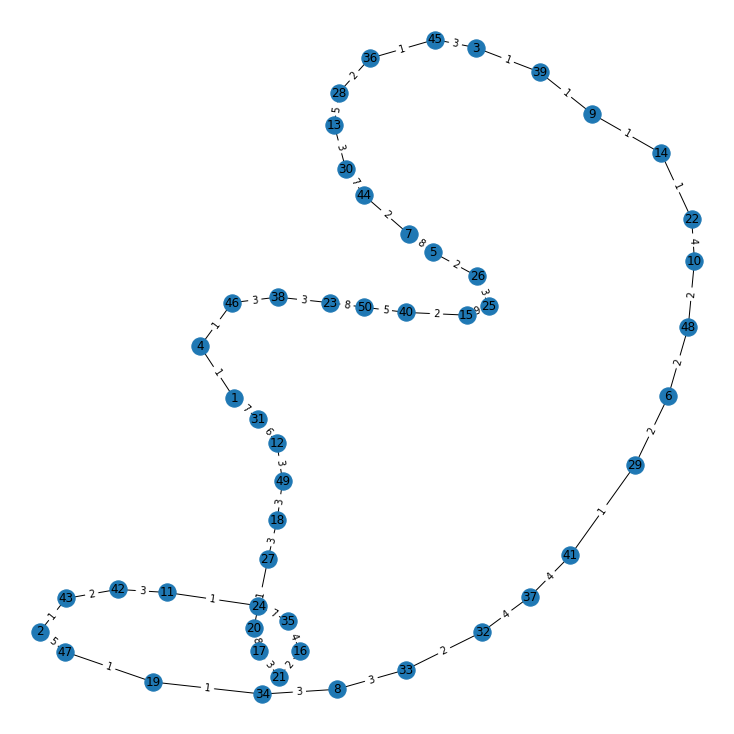

Objective Value: 160


In [12]:
solution = mdl.solve(log_output=True) # Solve the TSP problem
#print(mdl.export_to_string()) # Export the model to String
valor_objetivo = mdl.solution.get_objective_value() # Get the objective value of the final solution
x=solution.get_value_dict(x, keep_zeros=True, precision=1) # Update the 'x' dictionary with zero-valued variables
graphic(x,C,N) # Visualize the final solution
print("Objective Value:",valor_objetivo) # Print the objective value

#### Literature 
C. E. Miller, A. W. Tucker, and R. A. Zemlin. 1960. Integer Programming Formulation of Traveling Salesman Problems. J. ACM 7, 4 (Oct. 1960), 326–329. https://doi.org/10.1145/321043.321046
